In this notebook i will search for graph states that can perform error-tolerant effective measurements in more than one basis



In [1]:
from decoder_class import CascadeDecoder
from error_correction import pauli_error_decoder, best_checks
from graphs import gen_ring_graph, draw_graph
import numpy as np
import matplotlib.pyplot as plt
from pauli_class import Pauli


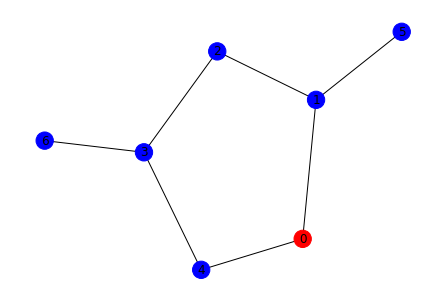

Z3_X4
['Z1_Z3_X2', 'Z1_X5', 'Z3_X6']
[0.997980143680256, 0.9871289648567143, 0.9753764998947893, 0.9628275986510416, 0.9495822184305444, 0.9357355280837234, 0.9213780121032014, 0.9065955747206323, 0.8914696440035447, 0.8760772759521814, 0.8604912585963398, 0.8447802160922114, 0.829008712819222, 0.8132373574768728, 0.7975229071815789, 0.7819183715635123, 0.7664731168634379, 0.7512329700295574, 0.7362403228143471, 0.7215342358713993, 0.7071505428522614, 0.6931219545032774, 0.6794781627624269, 0.6662459448561651, 0.6534492673962651, 0.6411093904766538, 0.6292449717702573, 0.6178721706258368, 0.6070047521648302, 0.5966541913781933, 0.586829777223238, 0.5775387167204751, 0.5687862390504496, 0.5605756996505878, 0.5529086843120302, 0.545785113276478, 0.5392033453330284, 0.5331602819150173, 0.5276514711968586, 0.5226712121908846, 0.5182126588441869, 0.5142679241354535, 0.5108281841718143, 0.5078837822856749, 0.5054243331315622, 0.5034388267829614, 0.5019157328291569, 0.5008431044720728, 0.5002

Text(0, 0.5, 'Probability of decoding correct state')

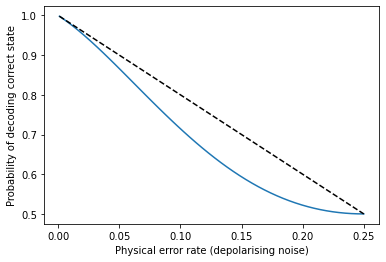

In [2]:
ps = np.linspace(0.001, 0.25)
g = gen_ring_graph(5)
g.add_nodes_from([5, 6])
g.add_edges_from([(1, 5), (3, 6)])
draw_graph(g)
g_decoder = CascadeDecoder(g)
t, m1, s1, s2 = g_decoder.decode(get_first_strat=True, first_traversal=True, mc=True, eff_meas_basis='z', pathfinding=False)
print(m1.to_str())
checks = best_checks(g, m1)
print([c.to_str() for c in checks])
prob, conf = pauli_error_decoder([m1], checks, ps)
print(prob)
plt.plot(ps, prob)
plt.plot(ps, (1-2*ps), 'k--')
plt.xlabel('Physical error rate (depolarising noise)')
plt.ylabel('Probability of decoding correct state')

See what the tolerance is like for just a single Z measurement


Z0
['Z0_Z2_X1', 'Z0_Z3_X4']
[0.9999681596802559, 0.9988519940832441, 0.9962298669881603, 0.9922192256548918, 0.986932624791839, 0.9804778306527548, 0.9729579251335885, 0.9644714098693205, 0.9551123103308066, 0.9449702799216162, 0.9341307040748734, 0.922674804350097, 0.9106797425300396, 0.8982187247175292, 0.8853611054323077, 0.8721724917078738, 0.8587148471883196, 0.8450465962251731, 0.8312227279742381, 0.8172949004924329, 0.8033115448346327, 0.7893179691505077, 0.7753564627813646, 0.7642448979591834, 0.7540816326530614, 0.7439183673469386, 0.7337551020408162, 0.7235918367346938, 0.7134285714285715, 0.7032653061224491, 0.6931020408163264, 0.6829387755102043, 0.6727755102040813, 0.6626122448979594, 0.6524489795918365, 0.6422857142857142, 0.6321224489795918, 0.6219591836734695, 0.6117959183673469, 0.6016326530612244, 0.5914693877551023, 0.5813061224489794, 0.5711428571428574, 0.5609795918367345, 0.5508163265306121, 0.5406530612244898, 0.5304897959183673, 0.5203265306122448, 0.51016326530

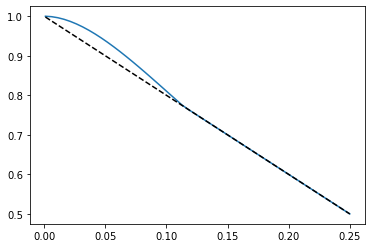

In [3]:
r5 = gen_ring_graph(5)
m = Pauli(z_ix=[0], x_ix=[], n=5)
print(m.to_str())
checks = best_checks(r5, m, spc=False)
# checks = [Pauli(x_ix=[1], z_ix=[0, 2], n=5), Pauli(x_ix=[4], z_ix=[0, 3], n=5)]
print([c.to_str() for c in checks])
prob, conf = pauli_error_decoder([m], checks, ps, ignore=[])
print(prob)
plt.plot(ps, prob)
plt.plot(ps, (1-2*ps), 'k--')